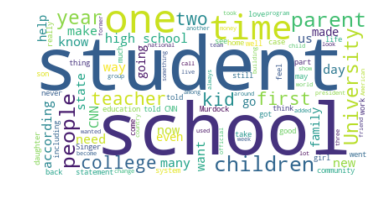

166156


In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import json
import matplotlib.pyplot as plt

fulltext = ""
#dataDir = "/Users/arashj/Documents/courses/cs221/project/trainData/foxnews.com"
dataDir = "/Users/arashj/Documents/courses/cs221/project/trainData/cnn.com"
filters = ["EDUCATION"]
#filters = ["ELECTION"]
for (currDir, _, fileList) in os.walk(dataDir):
            for filename in fileList:

                skipFile = True
                for fl in filters:
                    if fl in filename:
                        skipFile = False
                        break

                if skipFile:
                    continue

                if filename.endswith('.json'):
                    fullName = os.path.join(currDir, filename)
                    #print("filename : %s" % fullName)
                    with open(fullName, "r") as f:
                        cData = json.load(f)
                        articleText = cData.get("article", None)
                        fulltext += articleText

stopwords = set(STOPWORDS)
stopwords.update(["said", "say", "will", "says"])
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(fulltext)
#wordcloud = WordCloud(max_words=100, background_color="white").generate(fulltext)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(fulltext)
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(fulltext)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("/Users/arashj/Downloads/fox_election.png")

print(len(fulltext.split(" ")))

#pd.DataFrame.from_dict(cData, orient='index')
#print(df)